In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
coin_scaled_data =StandardScaler().fit_transform(
    market_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]]
)

In [8]:
# Create a DataFrame with the scaled data
coin_scaled_df = pd.DataFrame(coin_scaled_data, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original data
coin_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
coin_scaled_df = coin_scaled_df.set_index("coin_id")

# Display sample data
coin_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(coin_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

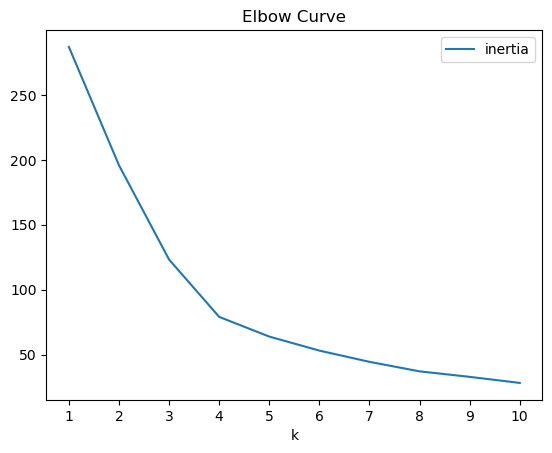

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_plot

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [17]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [19]:
# Fit the K-Means model using the scaled data
model.fit(coin_scaled_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(coin_scaled_df)

# View the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [23]:
# Create a copy of the DataFrame
crypto_clusters_df = coin_scaled_df.copy()

In [25]:
# Add a new column to the DataFrame with the predicted clusters
crypto_clusters_df["Predicted_Clusters"] = crypto_clusters

# Display sample data
crypto_clusters_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

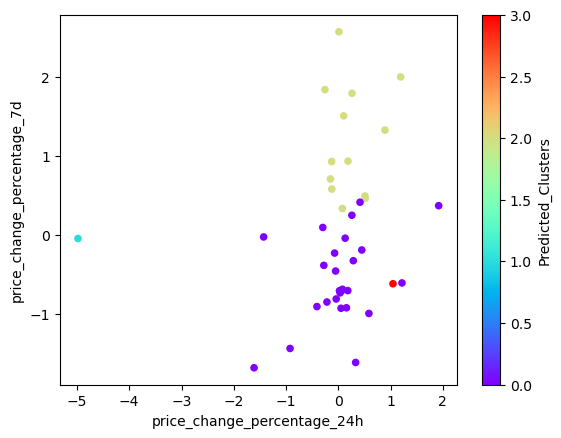

In [27]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clusters_plot = crypto_clusters_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Predicted_Clusters",
    colormap='rainbow')

clusters_plot 


### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance and set `n_components=3`.
model_pca = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca_data = model_pca.fit_transform(coin_scaled_df)

# View the first five rows of the DataFrame. 
crypto_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [34]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
model_pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [37]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
coin_pca_data_df = pd.DataFrame(
    crypto_pca_data,
    columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
coin_pca_data_df["coin_id"] = market_data_df.index

# Set the coinid column as index
coin_pca_data_df = coin_pca_data_df.set_index("coin_id")

# Display sample data
coin_pca_data_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(coin_pca_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_df = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


<Axes: title={'center': 'Elbow Curve using PCA data'}, xlabel='k'>

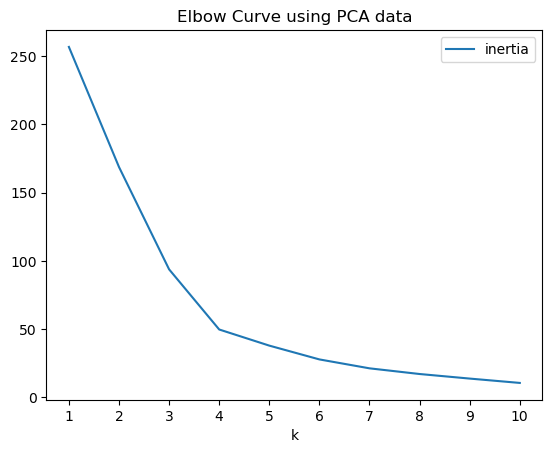

In [42]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve using PCA data", xticks=k)
elbow_plot_pca

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ from the best k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
model_pca_1 = KMeans(n_clusters = 4)

In [48]:
# Fit the K-Means model using the PCA data
model_pca_1.fit(coin_pca_data_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [50]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model_pca_1.predict(coin_pca_data_df)

# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[1 1 2 2 1 1 1 1 1 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 0 1 2 2 3
 2 2 2 2]


In [52]:
# Create a copy of the DataFrame with the PCA data
predicted_coin_pca_data_df = coin_pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
predicted_coin_pca_data_df["crypto_cluster"] = crypto_clusters_pca

# Display sample data
predicted_coin_pca_data_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

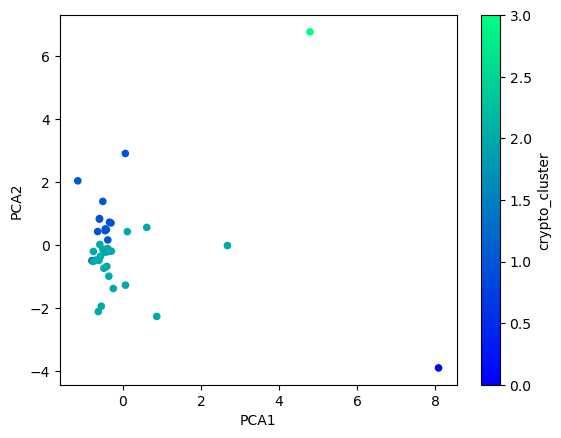

In [54]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
clusters_plot_pca = predicted_coin_pca_data_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap='winter')
clusters_plot_pca 

### Determine the Weights of Each Feature on each Principal Component

In [57]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(model_pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=coin_scaled_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
* "price_change_percentage_200d" and "price_change_percentage_1y" have the strongest positive influence on PCA1, while "price_change_percentage_24h" has the strongest negative influence on PCA1.

* "price_change_percentage_30d" and "price_change_percentage_14d" have the strongest positive influence on PCA2, whereas "price_change_percentage_1y" has the strong negative influence on PCA2.

* "price_change_percentage_7d" have the strongest positive influence on PCA3, while "price_change_percentage_60d" has the strongest negative influence on PCA3.
    